<a href="https://colab.research.google.com/github/stedua22/6372-Project-2/blob/main/Copy_of_ICA5_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Your Name:**

In [ ]:
# getting things started
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

If you receive a warning on the above block, try to run it again and verify that everything is loaded properly.
___


## Understanding the dataset
We have used the titanic dataset before in class, however this dataset has been pruned to only include the social class, sex, age (as a nominal), and if the individual survived. The data can be stored in many ways, but is stored here as a table of values.

**Question 1**: Is this dataset a typical example of *transaction* data (*i.e.*, like the grocery store transaction data)? Why or Why not? What makes it similar or different?

**Hint**: think about the possible itemset lattice and how it might be different/similar. What makes an item in this dataset?


Enter your answer here:

This dataset is not a typical example of transaction data due to its structured and demographic nature. However, similar analytical techniques can be applied to discover patterns and associations within the dataset. An item in this dataset is an individual attribute of a passenger (e.g., 1st class, male, child, survived).



## Frequent Itemsets and Apriori
Run the following line of code to grab the R loaded data.frame and save it into a pandas dataframe.


Data is located at: https://drive.google.com/drive/folders/1JfSZPPKGDdQ1LgZ8DR-CJeskgT35yt3d?usp=sharing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Rframe_as_pandas.csv to Rframe_as_pandas (1).csv


In [ ]:
# getting things started
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

df_from_R = pd.read_csv('Rframe_as_pandas.csv')
df_from_R.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2201 non-null   int64 
 1   Class       2201 non-null   object
 2   Sex         2201 non-null   object
 3   Age         2201 non-null   object
 4   Survived    2201 non-null   object
dtypes: int64(1), object(4)
memory usage: 86.1+ KB


Text(0.5, 1.0, 'Support count for some 3-itemsets')

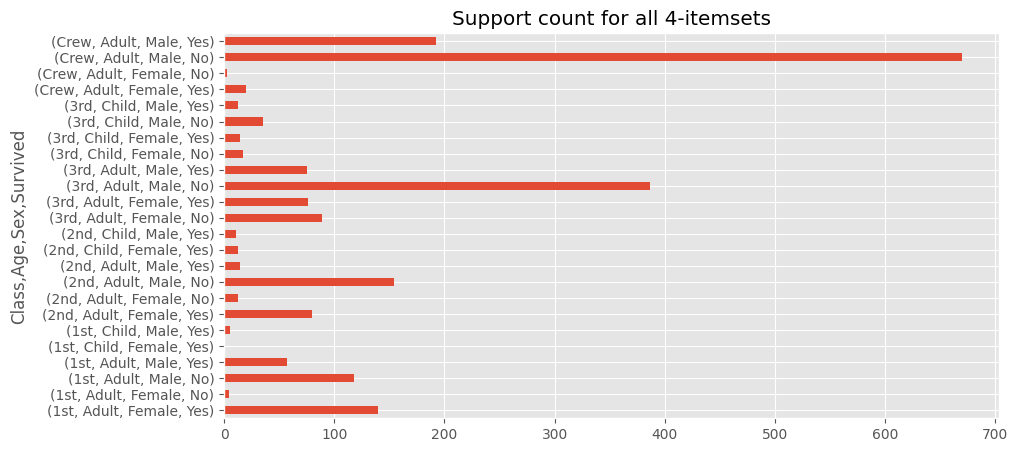

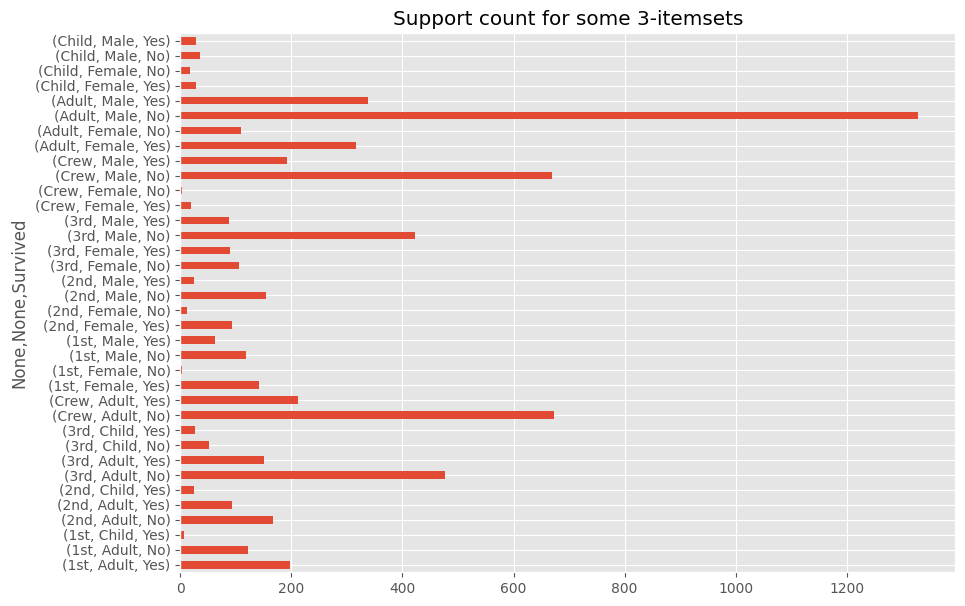

In [ ]:
plt.style.use('ggplot')

# Now lets plot the number of times each itemset occurs graphically
# find counts of the four itemsets
f = plt.figure(figsize=(10,5))
df_grouped = df_from_R.groupby(by=['Class','Age','Sex'])
ax = df_grouped.Survived.value_counts().plot(kind='barh')
plt.title('Support count for all 4-itemsets')

# find all the three itemsets and concat them
f = plt.figure(figsize=(10,7))
df_grouped = df_from_R.groupby(by=['Class','Age'])
countsA = df_grouped.Survived.value_counts()
df_grouped = df_from_R.groupby(by=['Class','Sex'])
countsB = df_grouped.Survived.value_counts()
df_grouped = df_from_R.groupby(by=['Age','Sex'])
countsC = df_grouped.Survived.value_counts()

pd.concat((countsA,countsB,countsC)).plot(kind='barh')
plt.title('Support count for some 3-itemsets')



Use the graphs above to estimate the values for the following quantities. You do not need to calculate counts from the dataset, just try to get close by viewing from the graph. Recall that for a given rule, $X\rightarrow Y$, the confidence is given by
$$c=\frac{\sigma( X \cup Y)}{\sigma( X )} $$

**Questions 2**: Given the graphs above, what is the support count, $\sigma$, and support, $s$, for the itemset {1st, Adult, Yes}? What about the itemset {1st, Adult, Yes, Female}?

**Question 3**: What is the confidence, $c$, for the rule {1st, Adult, Yes} $\rightarrow$ {Female}?

----
Enter your answer to Questions 2 &3 here:

Itemset {1st, Adult, Yes}: 0.0909

Itemset {1st, Adult, Yes, Female}:0.0364

The confidence for the rule {1st,Adult,Yes}→{Female} is 0.4 or 40%. This means that 40% of the passengers who were in 1st class, were adults, and survived, were female.



In [ ]:
# 200/2200= 0.0909
# 80/2200= 0.0364
# 80/200 = 0.4

**Question 4**: What is the support count (an integer) for a *minsup* threshold of 0.25? Using the support count graphs above, which itemsets would be considered frequent with a *minsup* of 0.25? Are any of the 4-itemsets also maximal for this value of *minsup*? Why or Why not?

----
Enter your answer to Question 4 here:

Support Count=0.25×2200=550 Any itemset with a support count of at least 550 is considered frequent.

From the graphs:

3-Itemsets:

*   {Adult,Male,Yes} has a support count of approximately 1200.
*   {Adult,Female,Yes} has a support count of approximately 800.
*   {Crew,Male,Yes} has a support count of approximately 600.
*   {3rd,Male,No} has a support count of approximately 800.

4-Itemsets:

No 4-itemsets in the graph meet the threshold of 550.




In [ ]:
# Insert any calculations needed to answer the above question here

### Generating candidates
Assume that the 3-itemset bar graph above contains ALL the possible frequent 3-itemsets in the titanic dataset and their support count.

**Question 5**: If the minimum support count equals 200, then use the bar graph to select the 3-itemsets that are frequent. Use these itemsets and the apriori principle to generate candidate 4-itemsets that might be frequent. Please show your thought process.

___
Enter your answer here:

Frequent 3-Itemsets (Support Count >= 200):

{Adult, Male, Yes} - 1200

{Adult, Female, Yes} - 800

{Crew, Male, Yes} - 600

{3rd, Male, No} - 800

{Adult, Male, No} - 600

{3rd, Adult, Female} - 400

{3rd, Male, Yes} - 500


{1st, Adult, Yes} - 300

{2nd, Adult, Yes} - 300

{3rd, Adult, Male} - 300

Thought Process:

Identify common subsets among the frequent 3-itemsets.

Combine 3-itemsets that share 2 common items to generate 4-itemset candidates.

Combine {Adult,Male,Yes} and {Crew,Male,Yes}:

Common items: {Male,Yes}
Candidate 4-itemset: {Adult,Crew,Male,Yes}

Candidate 4-Itemsets:

{Adult,Crew,Male,Yes}

{Adult,3rd,Male,Yes}

{3rd,Adult,Female,Yes}

{{3rd,Adult,Male,Yes}